# Ejemplo de Análisis de AM

In [104]:
#using Graphs

In [1]:
# Paquetes
using DelimitedFiles

In [73]:
using Colors

In [76]:
using Compose

In [2]:
using LightGraphs
using Plots, LaTeXStrings
pyplot()
using StatsPlots
using GraphPlot

┌ Info: Recompiling stale cache file /Users/yuriko/.julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/yuriko/.julia/compiled/v1.1/StatsPlots/SiylL.ji for StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1184


In [4]:
am_dicc =  readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/data/diccionarios/dictionary_final.csv", ',')
am_dicc = hcat(am_dicc[:,2],am_dicc[:,3],am_dicc[:,69])

3073×3 Array{Any,2}:
 "global_airports"      "global_num"  "AM_num"
 "AER"                 1              "NA"    
 "ASF"                 2              "NA"    
 "CEK"                 3              "NA"    
 "DME"                 4              "NA"    
 "EGO"                 5              "NA"    
 "GYD"                 6              "NA"    
 "KGD"                 7              "NA"    
 "KZN"                 8              "NA"    
 "LED"                 9              "NA"    
 "MRV"                10              "NA"    
 "NBC"                11              "NA"    
 "NJC"                12              "NA"    
 ⋮                                            
 "KZI"              3061              "NA"    
 "KOT"              3062              "NA"    
 "PSJ"              3063              "NA"    
 "LPS"              3064              "NA"    
 "ORX"              3065              "NA"    
 "BVS"              3066              "NA"    
 "MTE"              3067              "

In [5]:
am_matriz = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/matriz/AM_import_matrix.csv", '\t', Int)

67×67 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  1  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  1  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0    

In [6]:
am_nombres = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/matriz/AM_airport_names.csv", '\t', String)

67×1 Array{String,2}:
 "ACA"
 "BJX"
 "BOG"
 "BRU"
 "CCS"
 "CDG"
 "CJS"
 "CLQ"
 "CME"
 "CUL"
 "CUN"
 "CUU"
 "CVM"
 ⋮    
 "SMF"
 "TAM"
 "TAP"
 "TGZ"
 "TIJ"
 "TPQ"
 "TRC"
 "UIO"
 "VER"
 "VSA"
 "YUL"
 "VVI"

In [7]:
am_nombres[32,1]

"MEX"

In [8]:
am_nombres[60,1]

"TIJ"

In [18]:
red_AM=DiGraph{Int64}(am_matriz)

{67, 161} directed simple Int64 graph

In [16]:
typeof(red_AM)

SimpleDiGraph{Int64}

In [21]:
v=collect(1:nv(red_AM))

67-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
  ⋮
 56
 57
 58
 59
 60
 61
 62
 63
 64
 65
 66
 67

In [89]:
?degree

search: degree degree_histogram degree_centrality DegreeVertexCover



```
degree(g[, v])
```

Return a vector corresponding to the number of edges which start or end at each vertex in graph `g`. If `v` is specified, only return degrees for vertices in `v`. For directed graphs, this value equals the incoming plus outgoing edges. For undirected graphs, it equals the connected edges.

# Examples

```jldoctest
julia> using LightGraphs

julia> g = DiGraph(3);

julia> add_edge!(g, 2, 3);

julia> add_edge!(g, 3, 1);

julia> degree(g)
3-element Array{Int64,1}:
 1
 1
 2
```


In [55]:
nodelabel=collect(am_nombres);

degree_AM = degree(red_AM)
outdegree_AM = outdegree(red_AM)

67-element Array{Int64,1}:
 1
 3
 1
 1
 1
 1
 1
 1
 1
 2
 5
 1
 1
 ⋮
 1
 2
 1
 1
 6
 1
 1
 1
 3
 4
 1
 0

In [50]:
g = graphfamous("karate")
typeof(g)
dg=outdegree(g)

34-element Array{Int64,1}:
 16
  9
 10
  6
  3
  4
  4
  4
  5
  2
  3
  1
  2
  ⋮
  2
  5
  3
  3
  2
  4
  3
  4
  4
  6
 12
 17

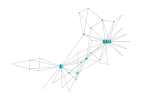

In [72]:
nodelabel = collect(1:nv(g))
#mysize = Float64[outdegree(g) for v in vertices(g)]
#mysize .^= 0.3 # zoom factor
ej=gplot(g, nodelabel=nodelabel, nodesize=dg, nodelabelsize=dg)

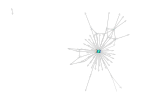

In [54]:
gplot(red_AM, arrowlengthfrac=0.04, nodelabel=v, nodesize=degree_AM*100, nodelabelsize=degree_AM*100)

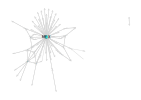

In [58]:
gplot(red_AM, arrowlengthfrac=0.04, nodelabel=nodelabel, nodesize=degree_AM*100, nodelabelsize=degree_AM*100)

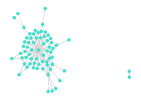

In [65]:
gplot(red_AM, arrowlengthfrac=0.04, nodelabelsize=degree_AM)

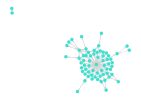

In [71]:
gplot(red_AM, arrowlengthfrac=0.04, nodelabelsize=degree_AM)

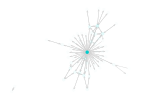

In [77]:
alphas = degree_AM/maximum(degree_AM)
nodefillc = [RGBA(0.0,0.8,0.8,i) for i in alphas]
gplot(red_AM, nodefillc=nodefillc, arrowlengthfrac=0.04)

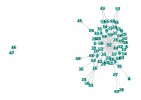

In [38]:
gplot(red_AM, nodelabel=v, arrowlengthfrac=0.04, nodelabelsize=1)

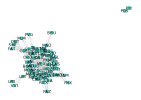

In [85]:
gplot(red_AM, nodelabel=nodelabel)

In [79]:
function neighbours(M::Array{Int64,2})
    
    nodos = size(M, 1) #aeropuertos
    vecindades = []
    
    for i in 1:nodos
        vecinos = findall(x -> x != 0, M[i, :])
        push!(vecindades, vecinos)
    end
    vecindades
end

neighbours (generic function with 1 method)

In [80]:
tt=neighbours(am_matriz)

67-element Array{Any,1}:
 [32]                   
 [32, 53, 60]           
 [32]                   
 [30]                   
 [32]                   
 [32]                   
 [32]                   
 [32]                   
 [32]                   
 [32, 60]               
 [18, 23, 25, 30, 32]   
 [32]                   
 [32]                   
 ⋮                      
 [16]                   
 [36, 64]               
 [32]                   
 [32]                   
 [2, 10, 16, 32, 39, 48]
 [32]                   
 [32]                   
 [32]                   
 [32, 57, 65]           
 [32, 34, 43, 64]       
 [32]                   
 Int64[]                

In [81]:
tt[32]

52-element Array{Int64,1}:
  1
  2
  3
  5
  6
  7
  8
  9
 10
 11
 12
 13
 14
  ⋮
 53
 54
 55
 58
 59
 60
 61
 62
 63
 64
 65
 66

In [82]:
am_vecinos = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/matriz/AM_neighbours.csv", '\t')

66×52 Array{Any,2}:
 32    ""    ""    ""    ""    ""  ""  …  ""  ""  ""  ""  ""  ""  ""  ""  ""
 32  53    60      ""    ""    ""  ""     ""  ""  ""  ""  ""  ""  ""  ""  ""
 32    ""    ""    ""    ""    ""  ""     ""  ""  ""  ""  ""  ""  ""  ""  ""
 30    ""    ""    ""    ""    ""  ""     ""  ""  ""  ""  ""  ""  ""  ""  ""
 32    ""    ""    ""    ""    ""  ""     ""  ""  ""  ""  ""  ""  ""  ""  ""
 32    ""    ""    ""    ""    ""  ""  …  ""  ""  ""  ""  ""  ""  ""  ""  ""
 32    ""    ""    ""    ""    ""  ""     ""  ""  ""  ""  ""  ""  ""  ""  ""
 32    ""    ""    ""    ""    ""  ""     ""  ""  ""  ""  ""  ""  ""  ""  ""
 32    ""    ""    ""    ""    ""  ""     ""  ""  ""  ""  ""  ""  ""  ""  ""
 32  60      ""    ""    ""    ""  ""     ""  ""  ""  ""  ""  ""  ""  ""  ""
 18  23    25    30    32      ""  ""  …  ""  ""  ""  ""  ""  ""  ""  ""  ""
 32    ""    ""    ""    ""    ""  ""     ""  ""  ""  ""  ""  ""  ""  ""  ""
 32    ""    ""    ""    ""    ""  ""     ""  ""  ""  ""

In [93]:
am_dist_ingrado = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/grados/AM_distrib_in_degree.csv", ',', Int64)

53×1 Array{Int64,2}:
  1
 43
 12
  5
  2
  1
  1
  0
  1
  0
  0
  0
  0
  ⋮
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  1

In [92]:
am_ingrado = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/grados/AM_in_degree.csv", ',', Int64)

67×1 Array{Int64,2}:
 1
 3
 1
 1
 1
 1
 1
 1
 1
 2
 5
 1
 1
 ⋮
 1
 2
 1
 1
 6
 1
 1
 1
 3
 4
 1
 0

In [91]:
am_dist_outgrado = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/grados/AM_distrib_out_degree.csv", ',', Int64)

54×1 Array{Int64,2}:
  1
 44
 11
  4
  3
  2
  0
  0
  1
  0
  0
  0
  0
  ⋮
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  1

In [120]:
function plot_distrib(M::Array{Int64,2}, tipo::String, titulo::String, color::String)

    if tipo == "in"
        distribucion = am_dist_ingrado #distrib_in_degree(M::Array)
    elseif tipo == "out"
        distribucion = am_dist_outgrado #distrib_out_degree(M::Array)
    end
    distribucion

    graph = bar(distribucion, fillcolor = color, markersize = 3, linealpha = 0.5,
    title = titulo,
    xlabel = "Grado",
    ylabel = "Frecuencia",
    xlims = (-1,60), #obtener límites
    ylims = (-1,50)) #obtener límites
end

plot_distrib (generic function with 1 method)

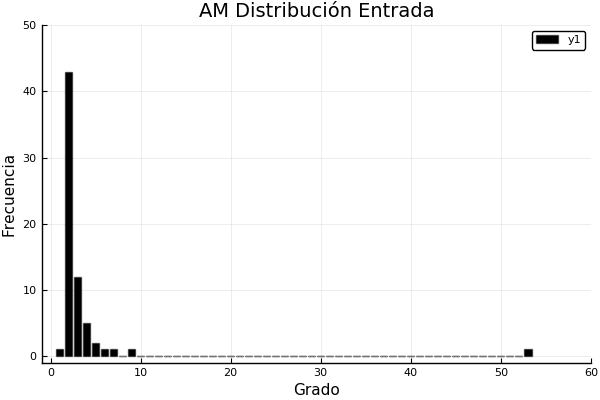

In [121]:
plot_distrib(am_matriz, "in", "AM Distribución Entrada", "black")

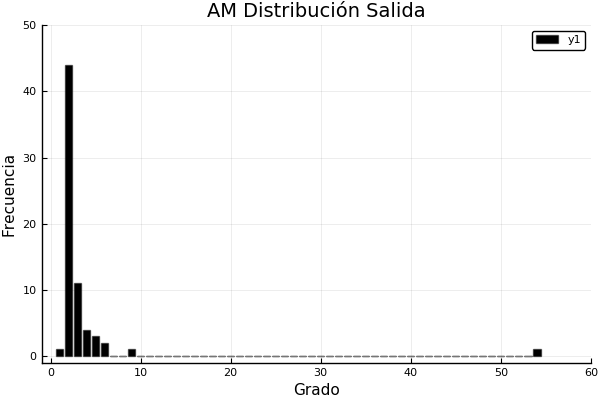

In [122]:
plot_distrib(am_matriz, "out", "AM Distribución Salida", "black")

In [86]:
am_outgrado = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/grados/AM_out_degree.csv", '\t', Int64)

1×67 Array{Int64,2}:
 1  3  1  1  1  1  1  1  1  2  5  1  1  …  1  2  1  1  5  1  1  1  3  4  1  1

In [94]:
am_max_long = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/longitudes/AM_max_length.csv", ',')

1×1 Array{Float64,2}:
 65.0

In [95]:
am_min_long = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/longitudes/AM_min_length.csv", ',')

1×1 Array{Float64,2}:
 65.0

In [96]:
am_avmax_long = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/longitudes/AM_av_max_length.csv", ',')

1×1 Array{Float64,2}:
 62.17910447761194

In [97]:
am_avmin_long = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/longitudes/AM_av_min_length.csv", ',')

1×1 Array{Float64,2}:
 6.3283582089552235

In [ ]:
am_av_long = 

In [98]:
am_layer_long = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/longitudes/AM_walk_layer_length.csv", ',')

1×1 Array{Float64,2}:
 257.37402985074624

In [99]:
am_vert_cob = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/cobertura/AM_vertex_coverage.csv", ',')

67×1 Array{Float64,2}:
 40.55
 40.32
 40.63
 41.91
 40.64
 40.66
 40.57
 40.59
 40.51
 40.52
 40.59
 40.62
 40.57
  ⋮   
 41.92
 42.6 
 40.63
 40.5 
 41.81
 40.64
 40.57
 40.6 
 40.94
 40.96
 40.64
  2.0 

In [100]:
am_layer_cob = readdlm("/Users/yuriko/Documents/UNAM/Tesis_Lic/RESULTADOS_SCRIPT/YURIKO_TESIS/AM/cobertura/AM_layer_coverage.csv", ',')

1×1 Array{Float64,2}:
 38.772238805970154

In [ ]:
function r_walks(M::Array{Int64,2}, f::Int64, steps::Int64, iter::Int64)
    
    paths = zeros(Int64, (iter, steps + 1))
    s = f
    seed = 1
    vecindades = neighbours(M)

    for i in 1:iter
        paths[i, 1] = f
        
        for p in 1:steps 
            vecindad = vecindades[s]
            
            if vecindad == []
                break
            else
                a = sample(Xoroshiro128Plus(seed), vecindad) 
                paths[i, p + 1] = a
                s = a
                seed += 1
            end
            
        end
        s = f
        
    end
    
    return paths 
end

In [ ]:
function random_walk(M::Array{Int64,2}, steps::Int64, iter::Int64) 
    
    random_walks = []
    nodos = size(M, 1)
    
    for f in 1:nodos #aeropuertos
        paths = r_walks(M, f, steps, iter)
        push!(random_walks, paths)
    end
    
    random_walks
end